Forecasting of partition datasets in route ../dataset/partitions
Target: averaged_queue_time_per_job
Book source: Timeseries forecasting in Python (Manning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Analysis of medium partition
Based on techniques from book Python Data Science Essentials and Timeseries forecasting in Python

In [2]:
medium_df = pd.read_csv("../dataset/partitions/medium_partition.csv", index_col=False)
medium_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,25716.0,1.679344e+09,2.710670e+06,1.674810e+09,1.676872e+09,1.679630e+09,1.681584e+09,1.683887e+09
availability,25708.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
avg_alloc_mem,25708.0,1.098207e+05,2.346865e+04,0.000000e+00,9.298000e+04,1.077664e+05,1.237000e+05,2.400000e+05
avg_allocated_cpus_per_job,25709.0,7.864055e+02,2.500667e+02,-1.000000e+00,6.256783e+02,7.642718e+02,8.918710e+02,2.880000e+03
avg_allocated_nodes_per_job,25709.0,3.071354e+00,9.788056e-01,-1.000000e+00,2.444056e+00,2.985437e+00,3.483871e+00,1.125000e+01
node_total,23796.0,1.334600e+03,6.302740e+01,3.000000e+00,1.324000e+03,1.361000e+03,1.368000e+03,1.379000e+03
avg_cpus_load_lower,25708.0,7.681426e+01,1.689330e+02,0.000000e+00,3.636600e+01,5.250792e+01,6.806125e+01,1.664107e+03
nodes,23796.0,1.334600e+03,6.302740e+01,3.000000e+00,1.324000e+03,1.361000e+03,1.368000e+03,1.379000e+03
avg_cpus_load_upper,25708.0,1.675540e+02,2.422030e+02,2.000000e-02,9.505513e+01,1.106183e+02,1.301676e+02,3.910001e+03
avg_execution_time_per_job,25709.0,5.340006e+04,1.340223e+04,-1.000000e+00,4.452556e+04,5.238777e+04,6.160673e+04,1.862302e+05


In [3]:
# 1- detect columns to drop based on occurrence of null values (>1%)
null_values = medium_df.isnull().sum() * 100 / len(medium_df) # values gives the % of null values for each feature
columns_to_drop= null_values > 1.0
columns_to_drop = medium_df.loc[:, columns_to_drop].columns
# 1- Remove features with significant number of null values
medium_df.drop(columns_to_drop, axis=1, inplace=True)
# Remove rows with null values
medium_df.dropna(inplace=True)

In [4]:
# 1- convert date to time index
medium_df['date'] = pd.to_datetime(medium_df['date'].astype(np.int64), unit='s') 
medium_df.set_index('date', inplace=True)
# 2- remove features with no variance
filter = medium_df.std() == 0
features_to_drop = medium_df.columns[filter]
medium_df.drop(features_to_drop, axis=1, inplace=True)
medium_df.describe().transpose()  
# Sort time index
medium_df.sort_index(inplace=True)

Our target is to forecast the avg_queue_time_per_job based on other features in dataset

In [6]:
a_day_period = 12*24
a_week_period = 7 * a_day_period
full_dataset_len = len(medium_df)

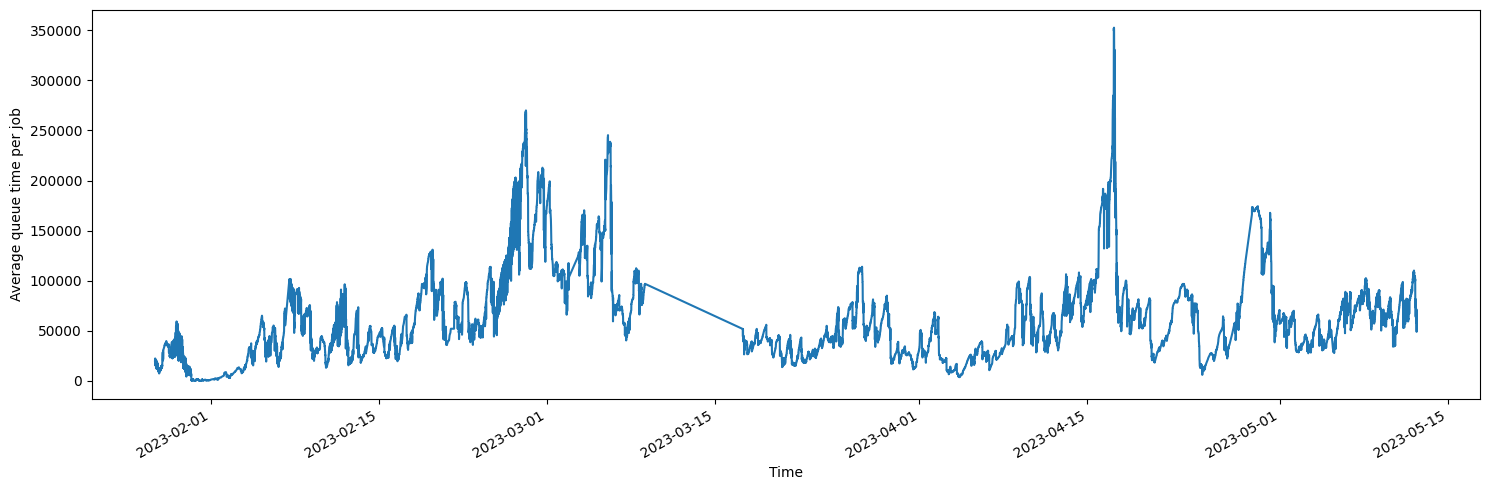

In [7]:
avg_job_queue_time = medium_df['avg_queue_time_per_job'][0:full_dataset_len]
time_index = medium_df.index[0:full_dataset_len]
fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Average queue time per job")
fig.set_size_inches(15, 5)
ax.plot(time_index, avg_job_queue_time)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Analyse seasonality with Fast Fourier Transform (FFT)
No seasonality is detected

2023-05-17 15:19:37.789044: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 15:19:37.966609: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 15:19:37.968180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 15:19:39.179368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


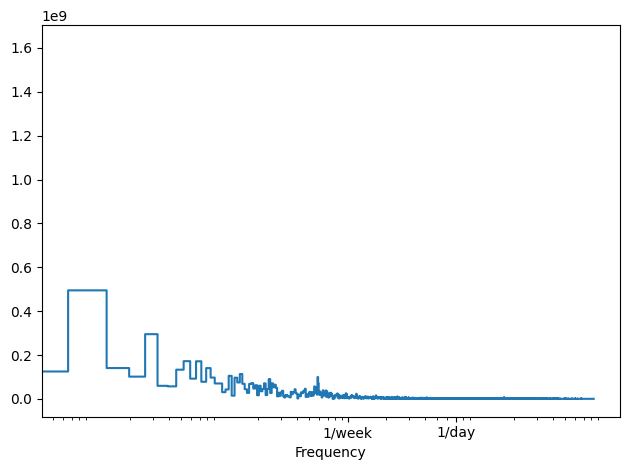

In [14]:
import tensorflow as tf
fft = tf.signal.rfft(medium_df['avg_queue_time_per_job'])

f_per_dataset = np.arange(0, len(fft))
n_sample_h = len(medium_df['avg_queue_time_per_job'])

hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week
f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


In [9]:
def determine_dropped_colums(df: pd.core.frame.DataFrame, df_selected: np.ndarray):
    original_columns = df.columns
    dropped_columns = []
    index = -1
    for value in df.iloc[0]:
        index += 1
        if value not in df_selected[0]:
            dropped_columns.append(original_columns[index])
    return dropped_columns

Feature selection: drop features with low variance

In [10]:
from sklearn.feature_selection import VarianceThreshold
medium_df_selected = VarianceThreshold(threshold=1.0).fit_transform(medium_df)
dropped_columns = determine_dropped_colums(medium_df, medium_df_selected)
old_columns = medium_df.columns
new_columns = old_columns.drop(dropped_columns)
medium_df_selected = pd.DataFrame(medium_df_selected, columns=new_columns, index=medium_df.index)
medium_df_selected.describe().transpose()
# These columns should have been removed from dataset: avg_allocated_nodes_per_job, avg_maximum_allocated_nodes_per_job, avg_minimum_requested_nodes_per_job

,count,mean,std,min,25%,50%,75%,max
avg_alloc_mem,25708.0,109820.712528,23468.654668,0.000000,92980.000000,107766.400000,123700.000000,240000.000000
avg_allocated_cpus_per_job,25708.0,786.394447,250.065269,-1.000000,625.678322,764.271845,891.785421,2880.000000
avg_cpus_load_lower,25708.0,76.814262,168.933019,0.000000,36.366000,52.507917,68.061250,1664.106667
avg_cpus_load_upper,25708.0,167.554043,242.202998,0.020000,95.055125,110.618333,130.167625,3910.001250
avg_execution_time_per_job,25708.0,53398.963446,13401.336650,-1.000000,44523.394166,52387.769912,61606.734940,186230.188144
avg_free_mem_lower,25708.0,187403.889372,18781.242197,7658.000000,179463.487500,190560.714286,199657.000000,246061.000000
avg_free_mem_upper,25708.0,234923.756764,7533.645046,160283.750000,230433.888889,236088.500000,240407.025000,249717.000000
avg_maximum_allocated_cpus_per_job,25708.0,671.881426,184.698289,203.279597,539.899576,655.960591,774.701571,1529.901679
avg_minimum_requested_cpus_per_job,25708.0,108.676288,16.093355,40.965278,100.820494,113.756863,120.081916,149.077244
avg_minimum_requested_memory_per_job,25708.0,214627.652140,33484.517983,60568.814480,202547.222378,231458.812227,236067.187328,240000.000000


Split dataset into train, validation and test

In [11]:
X_columns = medium_df_selected.columns.drop("avg_queue_time_per_job")
X = medium_df_selected[X_columns]
y = medium_df_selected["avg_queue_time_per_job"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
n = len(medium_df_selected)
train_df = medium_df_selected[0:int(0.7*n)] # 70% 
val_df = medium_df_selected[int(0.7*n):int(0.9*n)] # 20%
test_df = medium_df_selected[int(0.9*n):] # 10%

Neural Prophet

Whenever you use a dataset with NeuralProphet, it must be a pandas dataframe with the following format and properties:
- Time series column must be named “ds” and contain datetime values.
- Value column must be named “y” and contain float values.


Skip the existing metrics gap in timeseries
FIXME: There are still gaps in split timeseries. Then, autoregression won't work. If gap is small, consider interpolation

In [13]:
df1 = medium_df[:10884]
df2 = medium_df[10884:]
#df2 = df2.resample('5min').ffill()
df1 = df1.resample('5min').interpolate()
df2 = df2.resample('5min').interpolate()

In [234]:
df2.head()

,avg_alloc_mem,avg_allocated_cpus_per_job,avg_allocated_nodes_per_job,avg_cpus_load_lower,avg_cpus_load_upper,avg_execution_time_per_job,avg_free_mem_lower,avg_free_mem_upper,avg_maximum_allocated_cpus_per_job,avg_maximum_allocated_nodes_per_job,avg_minimum_requested_cpus_per_job,avg_minimum_requested_memory_per_job,avg_minimum_requested_nodes_per_job,avg_pending_jobs,avg_queue_time_per_job,avg_requested_cpus_per_job,avg_running_jobs,avg_time_left_per_job
date,,,,,,,,,,,,,,,,,,
2023-03-17 07:15:00,125133.333333,1130.029851,4.414179,64.905,120.361667,60675.787313,168616.166667,233931.166667,1099.216495,4.414179,116.855670,234189.690722,5.782609,23.0,51901.711340,740.173913,268.0,70950.494845
2023-03-17 07:20:00,125133.333333,1130.029851,4.414179,64.905,120.361667,60675.787313,168616.166667,233931.166667,1099.216495,4.414179,116.855670,234189.690722,5.782609,23.0,51901.711340,740.173913,268.0,70950.494845
2023-03-17 07:25:00,125133.333333,1123.188192,4.387454,64.830,109.793333,61809.605166,195458.166667,233743.166667,1093.224490,4.387454,115.775510,233432.653061,5.782609,23.0,51419.047619,740.173913,271.0,71386.071429
2023-03-17 07:30:00,125133.333333,1123.188192,4.387454,64.830,109.793333,61809.605166,195458.166667,233743.166667,1093.224490,4.387454,115.775510,233432.653061,5.782609,23.0,51419.047619,740.173913,271.0,71386.071429
2023-03-17 07:35:00,118960.000000,990.993711,3.871069,55.430,93.085714,56883.933962,203293.142857,235923.714286,974.076246,3.871069,117.337243,234337.829912,5.782609,23.0,44372.653959,740.173913,318.0,72597.307918


(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

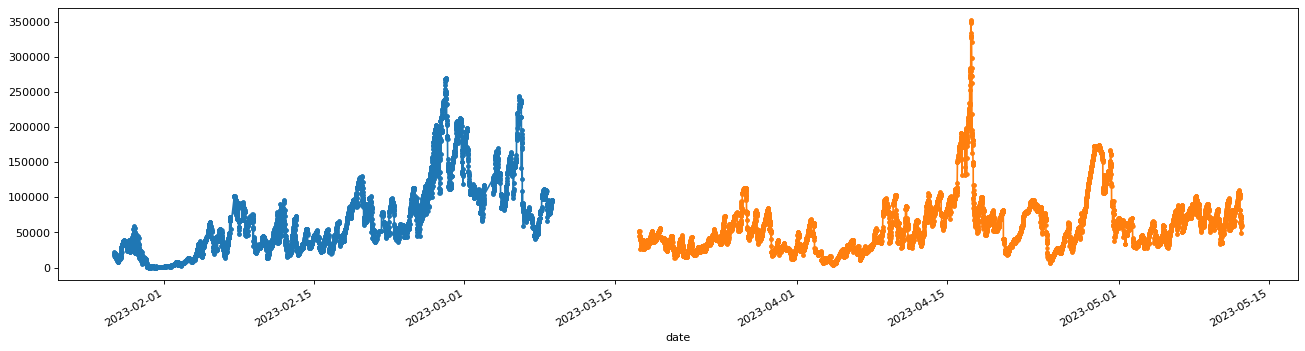

In [237]:
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80)

df1['avg_queue_time_per_job'].plot(marker='.'), df2['avg_queue_time_per_job'].plot(marker='.')

In [14]:
df = pd.DataFrame(data=df2["avg_queue_time_per_job"], columns=["avg_queue_time_per_job"])
df['ds'] = df2.index
index = range(len(df2))
df.index = index
df.rename(columns={'avg_queue_time_per_job': 'y'}, inplace=True)
df.head()

,y,ds
0,51901.711340,2023-03-17 07:15:00
1,51901.711340,2023-03-17 07:20:00
2,51419.047619,2023-03-17 07:25:00
3,51419.047619,2023-03-17 07:30:00
4,44372.653959,2023-03-17 07:35:00


In [15]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")
m = NeuralProphet()
#Use static plotly in notebooks
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)


Finding best initial lr: 100%|██████████| 255/255 [00:01<00:00, 158.62it/s]


Epoch 91: 100%|██████████| 91/91 [00:01<00:00, 56.81it/s, loss=0.0148, v_num=100, MAE=1.78e+4, RMSE=2.44e+4, Loss=0.0147, RegLoss=0.000]   


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 147.24it/s]


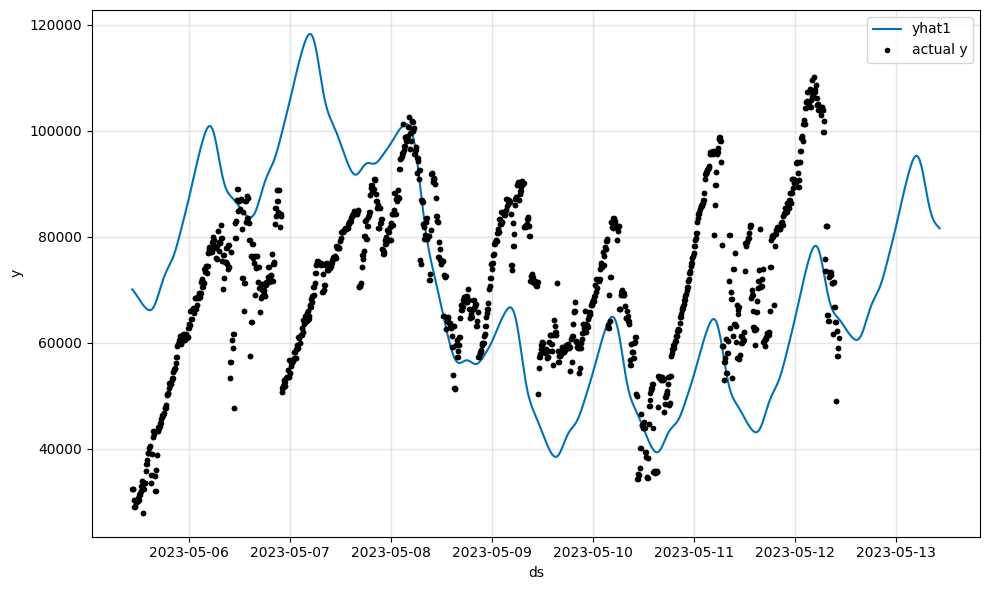

In [16]:
a_day = int((60*24)/5) # sampling every 5 min. This is the period of one day
a_week = 7*a_day
df_future = m.make_future_dataframe(df, n_historic_predictions=a_week, periods=a_day)
forecast = m.predict(df_future)
m.plot(forecast)

Analysing seasonality

Finding best initial lr: 100%|██████████| 255/255 [00:02<00:00, 106.89it/s]


Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 55.95it/s]


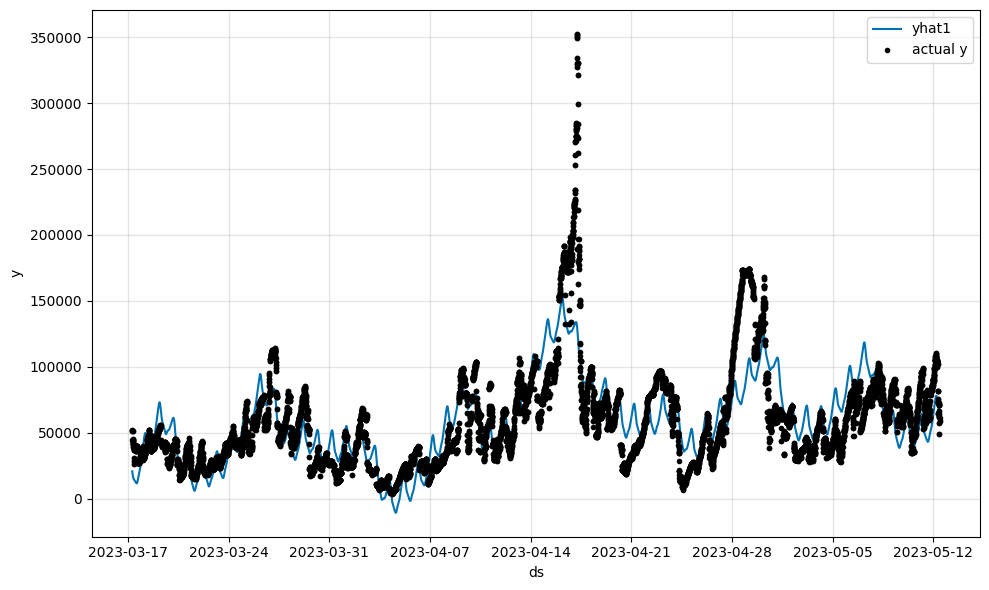

In [241]:
m = NeuralProphet(
    # Disable seasonality components, except daily
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
)
metrics = m.fit(df)
forecast = m.predict(df)
m.set_plotting_backend("matplotlib")
m.plot(forecast)

Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 43.20it/s]


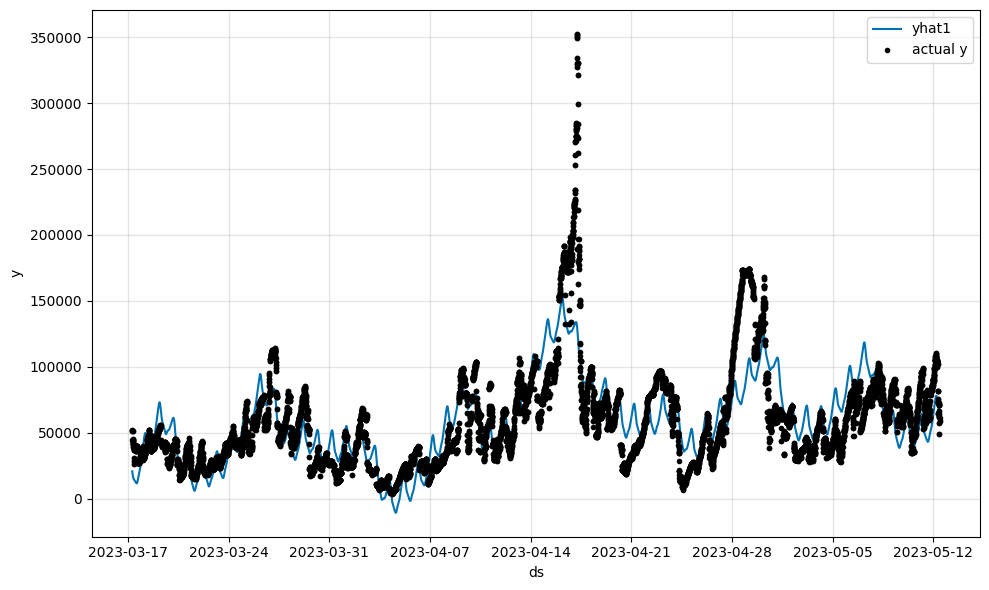

In [242]:
forecast = m.predict(df)
m.set_plotting_backend("matplotlib")
m.plot(forecast)

Residuals

In [243]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
#fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [244]:
import matplotlib.pyplot as plt
def plot_data_frame(df, x_label, y_label):
    time_index = df.index
    fig, ax = plt.subplots()
    x = df[x_label]
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.set_size_inches(15, 5)
    ax.plot(time_index, df[y_label])
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

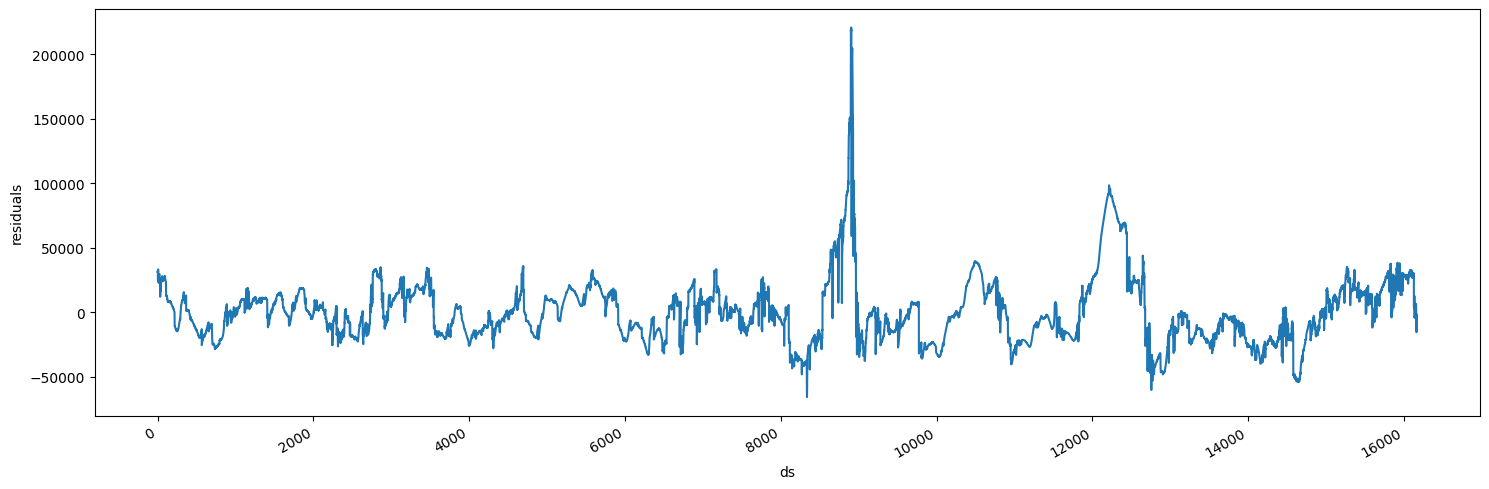

In [245]:
plot_data_frame(df_residuals, "ds", "residuals")

Autoregression

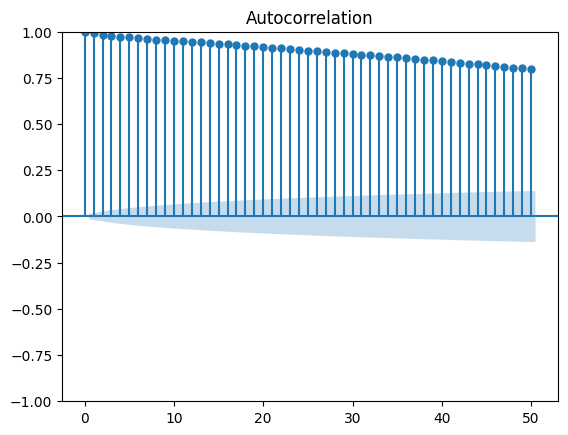

In [246]:
from statsmodels.graphics.tsaplots import plot_acf
plt = plot_acf(df_residuals["residuals"], lags=50)

Finding best initial lr: 100%|██████████| 255/255 [00:02<00:00, 93.88it/s] 


Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 42.85it/s]


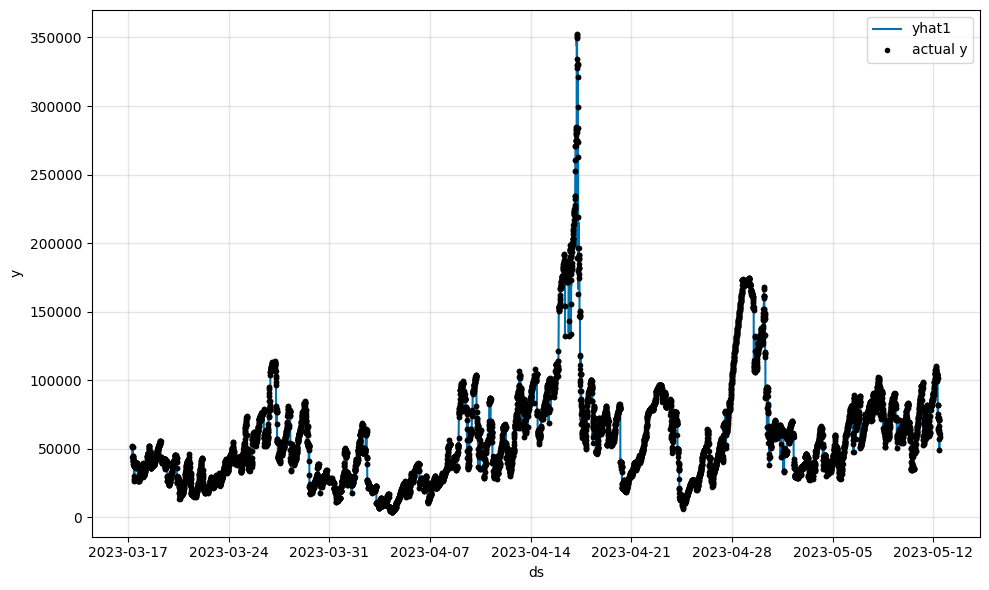

In [247]:
m = NeuralProphet(
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=5
    )
m.set_plotting_backend("matplotlib")
ar_metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

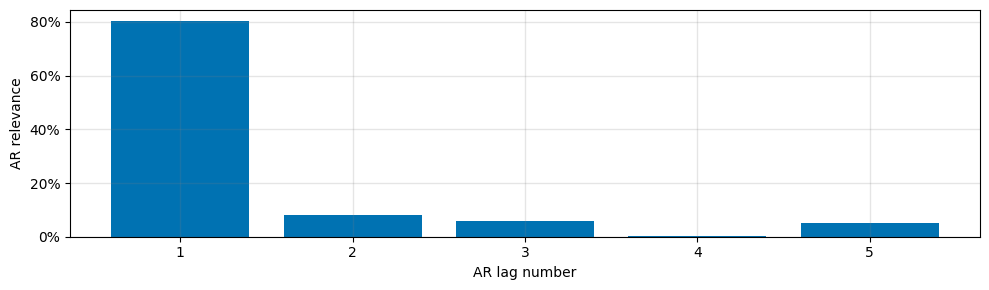

In [248]:
m.plot_parameters(components=["autoregression"])

Lagged regressors

In [251]:
# Features selected by percentile selection (25%)
selected_columns = [
       'avg_queue_time_per_job',
       'avg_minimum_requested_cpus_per_job',
       'avg_minimum_requested_memory_per_job', 
       'avg_requested_cpus_per_job',
       'avg_running_jobs']
df_lr = pd.DataFrame(data=df2[selected_columns], columns=selected_columns)
df_lr['ds'] = df2.index
index = range(len(df2))
df_lr.index = index
df_lr.rename(columns={'avg_queue_time_per_job': 'y'}, inplace=True)
df_lr.head()

,y,avg_minimum_requested_cpus_per_job,avg_minimum_requested_memory_per_job,avg_requested_cpus_per_job,avg_running_jobs,ds
0,51901.711340,116.855670,234189.690722,740.173913,268.0,2023-03-17 07:15:00
1,51901.711340,116.855670,234189.690722,740.173913,268.0,2023-03-17 07:20:00
2,51419.047619,115.775510,233432.653061,740.173913,271.0,2023-03-17 07:25:00
3,51419.047619,115.775510,233432.653061,740.173913,271.0,2023-03-17 07:30:00
4,44372.653959,117.337243,234337.829912,740.173913,318.0,2023-03-17 07:35:00


Finding best initial lr: 100%|██████████| 255/255 [00:02<00:00, 97.07it/s] 


Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 35.22it/s]


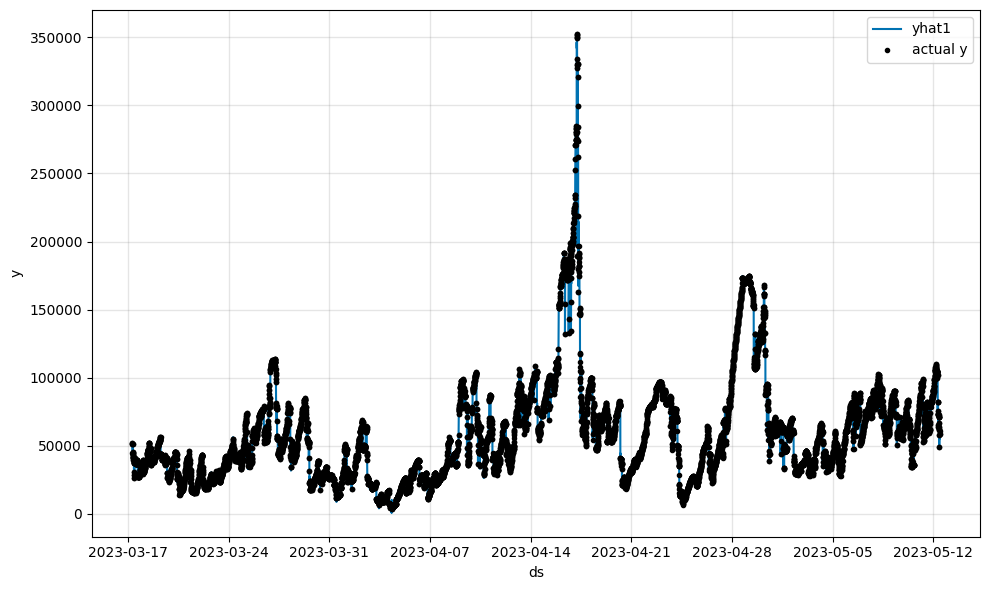

In [252]:
m = NeuralProphet(
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=5,
)
m.set_plotting_backend("matplotlib")
# Add lagged regressor for additional features: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'
m.add_lagged_regressor("avg_minimum_requested_cpus_per_job")
m.add_lagged_regressor("avg_minimum_requested_memory_per_job")
m.add_lagged_regressor("avg_requested_cpus_per_job")
m.add_lagged_regressor("avg_running_jobs")

lr_metrics = m.fit(df_lr)
forecast = m.predict(df_lr)
m.plot(forecast)

When comparing training metrics from AR and Lagged Regressors, the MAE and RMSE is higher in the latter, despite the loss is lower

In [253]:
ar_metrics, lr_metrics

(             MAE           RMSE      Loss  RegLoss  epoch
 0   92356.000000  106731.390625  0.239329      0.0      0
 1   73489.437500   85166.632812  0.157195      0.0      1
 2   49228.089844   57567.042969  0.073417      0.0      2
 3   25991.351562   31198.550781  0.022102      0.0      3
 4   13731.091797   16658.111328  0.006273      0.0      4
 ..           ...            ...       ...      ...    ...
 86    910.648987    2415.670654  0.000222      0.0     86
 87    912.611389    2405.503662  0.000222      0.0     87
 88    906.339844    2410.358643  0.000223      0.0     88
 89    907.872498    2378.797119  0.000222      0.0     89
 90    908.620117    2408.801758  0.000222      0.0     90
 
 [91 rows x 5 columns],
              MAE           RMSE      Loss  RegLoss  epoch
 0   86025.609375  104466.414062  0.211002      0.0      0
 1   69539.320312   84187.796875  0.143068      0.0      1
 2   50709.496094   61374.019531  0.078576      0.0      2
 3   33056.699219   40776.1953

Future Regressor

Finding best initial lr: 100%|██████████| 255/255 [00:02<00:00, 89.70it/s] 


Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 43.09it/s]


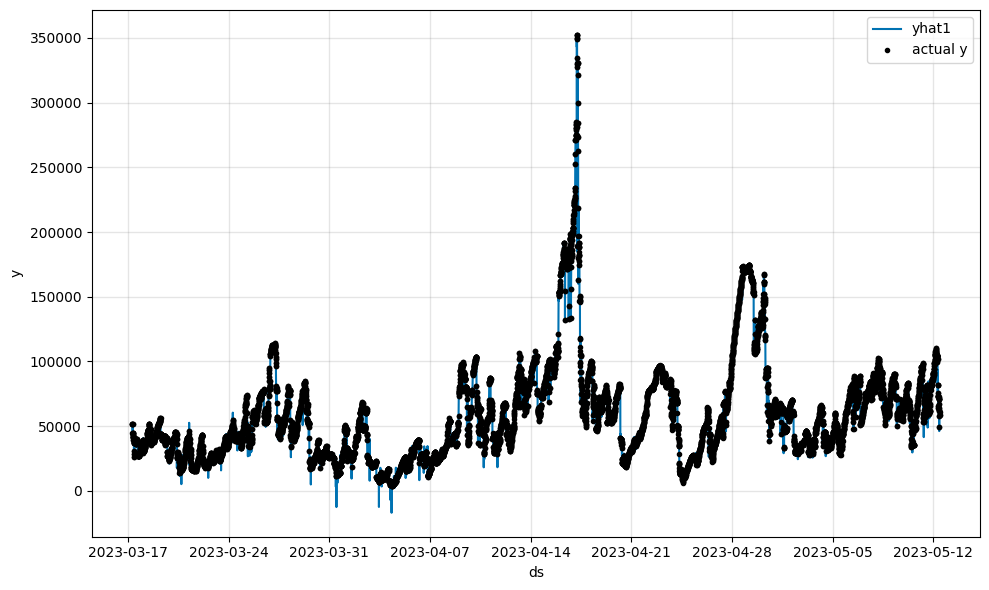

In [255]:
m = NeuralProphet(
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=5,
)
m.set_plotting_backend("matplotlib")
# Add lagged regressor for additional features: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'
m.add_future_regressor("avg_minimum_requested_cpus_per_job")
m.add_future_regressor("avg_minimum_requested_memory_per_job")
m.add_future_regressor("avg_requested_cpus_per_job")
m.add_future_regressor("avg_running_jobs")

fr_metrics = m.fit(df_lr)
forecast = m.predict(df_lr)
m.plot(forecast)

Future regressors obtain better performance

In [262]:
lr_metrics, fr_metrics

(               MAE           RMSE      Loss  RegLoss  epoch
 0    259763.171875  313753.531250  0.867284      0.0      0
 1    220597.437500  269479.343750  0.694803      0.0      1
 2    181403.187500  223235.328125  0.523652      0.0      2
 3    143742.437500  178190.437500  0.364310      0.0      3
 4    107506.898438  131959.312500  0.219973      0.0      4
 ..             ...            ...       ...      ...    ...
 134    1748.845337    3828.792969  0.000389      0.0    134
 135    1743.692017    3831.070068  0.000389      0.0    135
 136    1745.306763    3881.401611  0.000389      0.0    136
 137    1742.820068    3849.136719  0.000388      0.0    137
 138    1738.786987    3788.277832  0.000388      0.0    138
 
 [139 rows x 5 columns],
                MAE           RMSE      Loss  RegLoss  epoch
 0    453420.406250  569994.687500  1.587418      0.0      0
 1    395220.875000  497349.343750  1.329406      0.0      1
 2    326637.000000  411781.750000  1.039718      0.0     

Uncertaintly

In [17]:
confidence_level = 0.9
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

Finding best initial lr: 100%|██████████| 255/255 [00:02<00:00, 124.40it/s]


Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 130.13it/s]


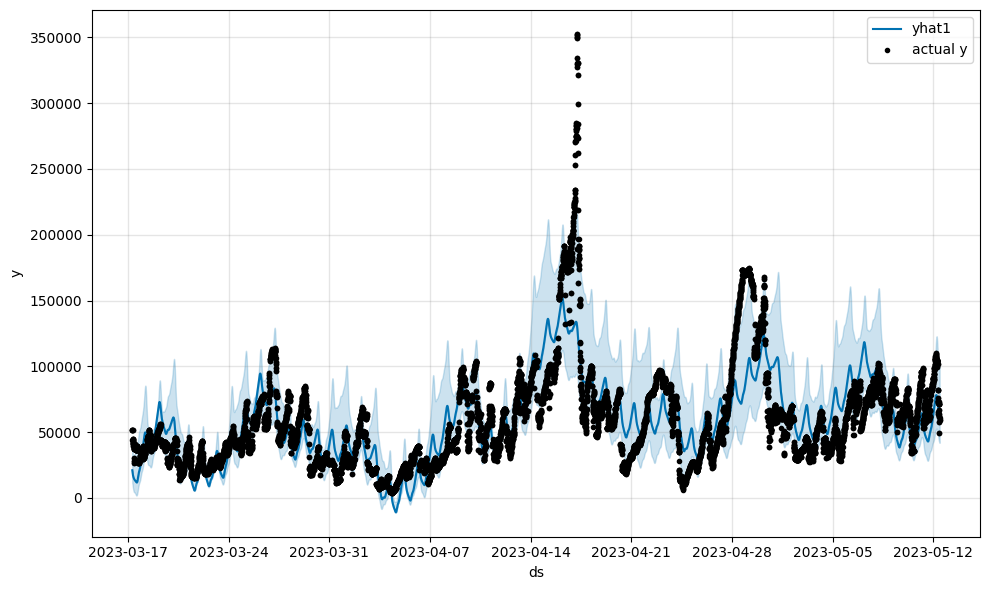

In [18]:
m = NeuralProphet(quantiles=quantiles)
m.set_plotting_backend("matplotlib")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

For the above method we used a quantile regression model, that uses the pinball loss function to assess the goodness-of-fit. While the defined coverage is guaranteed for the training date, it is not guaranteed for unseen data. More complex methods like Conformal Prediction can be used to guarantee marginal coverage for unseen data

In [ ]:
# evaluate uncertainy on calibration set
# FIXME: conformal_predict does not work with pandas 2.X
# Installing latest candidate version of NeuralProphet does not fix this issue
train_df, val_df = m.split_df(df, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = m.conformal_predict(train_df, val_df, alpha=0.1, method=method)
m.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

Validation

In [19]:
m = NeuralProphet(
    #yearly_seasonality=False,
    #weekly_seasonality=True,
    #daily_seasonality=True,
    #n_lags=5,
    #quantiles=quantiles
    )
m.set_plotting_backend("matplotlib")
# Add lagged regressor for additional features: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'
# m.add_future_regressor("avg_running_jobs")
# m.add_future_regressor("node_alloc")
# m.add_future_regressor("node_idle")
# m.add_future_regressor("node_total")
# m.add_future_regressor("nodes")

# df_train, df_test = m.split_df(df_lr, valid_p=0.1)
# metrics = m.fit(df_train, validation_df=df_test, progress=None)
df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.2)
metrics_train = m.fit(df=df_train, freq="5min")
metrics_test = m.test(df=df_test)

Finding best initial lr: 100%|██████████| 252/252 [00:01<00:00, 155.15it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 65.78it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03098220005631447
         MAE_val              34757.01953125
        RMSE_val              36950.86328125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Comparing training and testing metrics we see this model faces high overfitting

In [20]:
metrics_train

,MAE,RMSE,Loss,RegLoss,epoch
0,267563.843750,307759.531250,0.964469,0.0,0
1,228078.312500,264489.843750,0.767361,0.0,1
2,169195.906250,197791.765625,0.481685,0.0,2
3,100031.750000,118288.656250,0.187933,0.0,3
4,66604.070312,82185.671875,0.091522,0.0,4
...,...,...,...,...,...
91,18576.058594,26347.771484,0.013827,0.0,91
92,18576.169922,26366.894531,0.013867,0.0,92
93,18617.814453,26525.148438,0.014159,0.0,93
94,18514.007812,26292.660156,0.013779,0.0,94


In [21]:
metrics_test

,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,34757.019531,36950.863281,0.030982,0.0


In [22]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")
metrics_train2 = m.fit(df=df, freq="5min")

Finding best initial lr: 100%|██████████| 255/255 [00:01<00:00, 164.35it/s]


Epoch 91: 100%|██████████| 91/91 [00:01<00:00, 64.06it/s, loss=0.0128, v_num=103, MAE=1.77e+4, RMSE=2.45e+4, Loss=0.0147, RegLoss=0.000]   


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 149.60it/s]


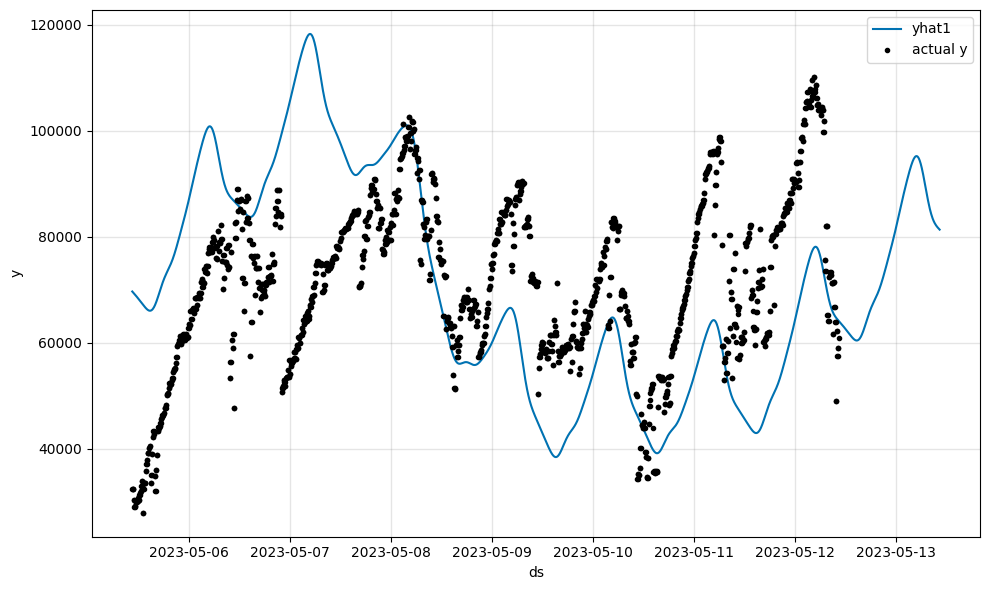

In [23]:
a_day_period = int(60*24/5)
a_week_period = a_day_period * 7
future = m.make_future_dataframe(df, periods=a_day_period, n_historic_predictions=a_week_period)
forecast = m.predict(future)
m.plot(forecast)

Visualize training progress. In blue the train loss, in orange the validation loss. This model is facing overfitting

Finding best initial lr: 100%|██████████| 252/252 [00:01<00:00, 146.09it/s]


Epoch 96: 100%|██████████| 96/96 [00:01<00:00, 71.69it/s, loss=0.0164, v_num=104, MAE_val=3.47e+4, RMSE_val=3.68e+4, Loss_val=0.0308, RegLoss_val=0.000, MAE=1.85e+4, RMSE=2.63e+4, Loss=0.0138, RegLoss=0.000]   


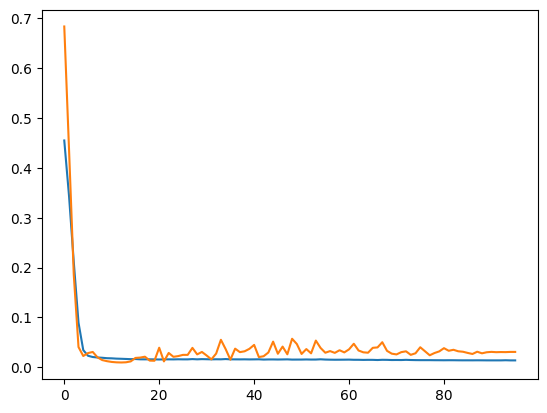

In [24]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")

df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.2)
metrics = m.fit(df=df_train, freq="5min", validation_df=df_test, progress="plot")

In [25]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
95,34652.113281,36829.621094,0.030798,0.0,95,18544.361328,26291.837891,0.013801,0.0


Time series cross-validation

In [26]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {}

folds = NeuralProphet(**params).crossvalidation_split_df(df, freq="5min", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

In [27]:
def add_row(df, values):
    new_df = pd.DataFrame(df)
    new_df.loc[-1] = values
    new_df.index = new_df.index + 1  # shifting index
    new_df = new_df.sort_index()
    return new_df

In [28]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train = m.fit(df=df_train, freq="5min")
    test = m.test(df=df_test)
    metrics_train = add_row(metrics_train, train[METRICS].iloc[-1].values)
    metrics_test = add_row(metrics_test, test[METRICS_VAL].iloc[-1].values)

Finding best initial lr: 100%|██████████| 245/245 [00:01<00:00, 126.95it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 55.39it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.3460489511489868
         MAE_val              52304.44140625
        RMSE_val               58493.4140625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 247/247 [00:01<00:00, 128.22it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 74.26it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.5778625011444092
         MAE_val                86320.1875
        RMSE_val                93276.0625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 249/249 [00:01<00:00, 129.68it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 67.29it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.48311322927474976
         MAE_val               98816.734375
        RMSE_val                103513.3125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 251/251 [00:01<00:00, 134.91it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 78.58it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.6626215577125549
         MAE_val              117764.6796875
        RMSE_val              124141.5078125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 252/252 [00:01<00:00, 126.62it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 77.67it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03062581643462181
         MAE_val               34544.8671875
        RMSE_val                36740.15625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [29]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE_val,RMSE_val
mean,77950.182031,83232.890625
std,34030.830106,35211.119775
min,34544.867188,36740.156250
max,117764.679688,124141.507812


Train, Validate and Test procedure

In [30]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")

# create a test holdout set:
df_train_val, df_test = m.split_df(df=df, freq="5min", valid_p=0.2)

# create a validation holdout set:
df_train, df_val = m.split_df(df=df_train_val, freq="5min", valid_p=0.2)

# fit a model on training data and evaluate on validation set.
metrics_train1 = m.fit(df=df_train, freq="5min")
metrics_val = m.test(df=df_val)

# refit model on training and validation data and evaluate on test set.
m = NeuralProphet()
m.set_plotting_backend("matplotlib")
metrics_train2 = m.fit(df=df_train_val, freq="5min")
metrics_test = m.test(df=df_test)

Finding best initial lr: 100%|██████████| 250/250 [00:02<00:00, 118.66it/s]


Testing DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 62.97it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.14930185675621033
         MAE_val              46997.01171875
        RMSE_val              57356.83984375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 252/252 [00:02<00:00, 120.28it/s]


Testing DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 77.56it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03040800616145134
         MAE_val               34389.984375
        RMSE_val               36601.984375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [31]:
metrics_train1["split"] = "train1"
metrics_train2["split"] = "train2"
metrics_val["split"] = "validate"
metrics_test["split"] = "test"
metrics_train1.head(), metrics_train2.head(), metrics_val.head(), metrics_test.head()

(             MAE           RMSE      Loss  RegLoss  epoch   split
 0  162018.140625  176024.421875  0.801788      0.0      0  train1
 1  143813.703125  156597.671875  0.668148      0.0      1  train1
 2  115927.726562  127145.398438  0.468836      0.0      2  train1
 3   77047.250000   87231.203125  0.229535      0.0      3  train1
 4   44326.710938   55267.726562  0.088087      0.0      4  train1,
              MAE           RMSE      Loss  RegLoss  epoch   split
 0  320373.937500  349344.750000  1.279509      0.0      0  train2
 1  271368.812500  299041.343750  1.026831      0.0      1  train2
 2  191947.171875  213866.328125  0.623781      0.0      2  train2
 3   86406.140625   98146.898438  0.160226      0.0      3  train2
 4   39607.183594   49378.710938  0.037308      0.0      4  train2,
         MAE_val      RMSE_val  Loss_test  RegLoss_test     split
 0  46997.011719  57356.839844   0.149302           0.0  validate,
         MAE_val      RMSE_val  Loss_test  RegLoss_test split

In [32]:
metrics_train1_last = metrics_train1.tail(1).drop(columns=["epoch", "RegLoss"])
metrics_train2_last = metrics_train2.tail(1).drop(columns=["epoch", "RegLoss"])
metrics_val_last = metrics_val.tail(1).drop(columns=["RegLoss_test"]).rename(columns={"Loss_test":"Loss", "MAE_val":"MAE", "RMSE_val":"RMSE"})
metrics_test_last = metrics_test.tail(1).drop(columns=["RegLoss_test"]).rename(columns={"Loss_test":"Loss", "MAE_val":"MAE", "RMSE_val":"RMSE"})
metrics_train1_last, metrics_train2_last, metrics_val_last, metrics_test_last

(              MAE          RMSE      Loss   split
 101  14758.049805  20338.578125  0.015259  train1,
              MAE          RMSE      Loss   split
 95  18522.443359  26326.998047  0.013792  train2,
             MAE          RMSE      Loss     split
 0  46997.011719  57356.839844  0.149302  validate,
             MAE          RMSE      Loss split
 0  34389.984375  36601.984375  0.030408  test)

Again a huge overfitting is visible from validation/test results
TODO: Try to tune hyperparameters.
According to NeuralNetwork documentation: 
If it looks like the model is overfitting to the training data (the live loss plot can be useful hereby), you can reduce epochs and learning_rate, and potentially increase the batch_size. If it is underfitting, the number of epochs and learning_rate can be increased and the batch_size potentially decreased.

In [33]:
pd.concat([metrics_train1_last, metrics_train2_last, metrics_val_last, metrics_test_last])

,MAE,RMSE,Loss,split
101,14758.049805,20338.578125,0.015259,train1
95,18522.443359,26326.998047,0.013792,train2
0,46997.011719,57356.839844,0.149302,validate
0,34389.984375,36601.984375,0.030408,test


Train, Cross-Validate and Cross-Test evaluation

In [34]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {}

folds_val, folds_test = NeuralProphet(**params).double_crossvalidation_split_df(
    df, freq="5min", k=5, valid_pct=0.10, test_pct=0.10
)

In [35]:
metrics_train1 = pd.DataFrame(columns=METRICS)
metrics_val = pd.DataFrame(columns=METRICS_VAL)
for df_train1, df_val in folds_val:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train1 = m.fit(df=df_train, freq="5min")
    val = m.test(df=df_val)
    metrics_train1 = add_row(metrics_train1, train1[METRICS].iloc[-1].values)
    metrics_val = add_row(metrics_val, val[METRICS_VAL].iloc[-1].values)

metrics_train2 = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)
for df_train2, df_test in folds_test:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train2 = m.fit(df=df_train2, freq="5min")
    test = m.test(df=df_test)
    metrics_train2 = add_row(metrics_train2, train2[METRICS].iloc[-1].values)
    metrics_test = add_row(metrics_test, test[METRICS_VAL].iloc[-1].values)
    

Finding best initial lr: 100%|██████████| 250/250 [00:02<00:00, 124.51it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 55.10it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.013619589619338512
         MAE_val              14137.470703125
        RMSE_val                17599.15625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 250/250 [00:01<00:00, 137.42it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.06it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.01188675407320261
         MAE_val              15500.92578125
        RMSE_val                  16441.5
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 250/250 [00:01<00:00, 128.91it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 63.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.07650260627269745
         MAE_val              41132.64453125
        RMSE_val               41710.7421875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 250/250 [00:01<00:00, 138.77it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 25.66it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.057663626968860626
         MAE_val               35613.6328125
        RMSE_val              36212.68359375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 250/250 [00:02<00:00, 122.40it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 59.34it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.06572962552309036
         MAE_val              37798.12109375
        RMSE_val               38662.5390625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 254/254 [00:01<00:00, 127.09it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 68.85it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.021246926859021187
         MAE_val                23887.8125
        RMSE_val              29728.962890625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 254/254 [00:02<00:00, 126.43it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 70.64it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.013643285259604454
         MAE_val              21531.33203125
        RMSE_val                23554.8125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 254/254 [00:02<00:00, 113.98it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 57.40it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03086761198937893
         MAE_val               33879.7265625
        RMSE_val              34815.64453125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 254/254 [00:02<00:00, 119.74it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 59.74it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.014885258860886097
         MAE_val              20825.33203125
        RMSE_val              23591.376953125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 255/255 [00:02<00:00, 100.61it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 78.11it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.02254173718392849
         MAE_val              26408.544921875
        RMSE_val              28401.74609375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [36]:
metrics_train2.describe().loc[["mean", "std"]], metrics_val.describe().loc[["mean", "std"]], metrics_test.describe().loc[["mean", "std"]]

(               MAE          RMSE
 mean  16933.590234  23964.792969
 std     656.943363    886.824232,
            MAE_val      RMSE_val
 mean  28836.558984  30125.324219
 std   12955.060344  12127.590653,
            MAE_val      RMSE_val
 mean  25306.549609  28018.508594
 std    5269.253991   4711.625495)

Trying to reduce overfitting:
According to NeuralNetwork documentation: 
If it looks like the model is overfitting to the training data (the live loss plot can be useful hereby), you can reduce epochs and learning_rate, and potentially increase the batch_size. If it is underfitting, the number of epochs and learning_rate can be increased and the batch_size potentially decreased.
check model config hyperpameters:
m.config_train

Epoch 96: 100%|██████████| 96/96 [00:01<00:00, 58.47it/s, loss=0.0161, v_num=122, MAE_val=1.77e+4, RMSE_val=1.98e+4, Loss_val=0.0102, RegLoss_val=0.000, MAE=1.98e+4, RMSE=2.81e+4, Loss=0.0155, RegLoss=0.000]    


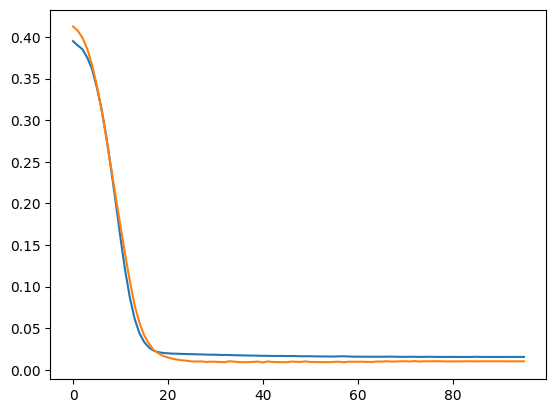

In [37]:
m = NeuralProphet(
    daily_seasonality=True,
    weekly_seasonality=True,
    #n_lags=5,
)
m.set_plotting_backend("matplotlib")

df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.2,)
metrics = m.fit(
    df=df_train, 
    freq="5min", 
    validation_df=df_test, 
    progress="plot",
    learning_rate=0.001,
    #batch_size=aday_period
)


In [38]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
95,17682.599609,19819.421875,0.0102,0.0,95,19824.429688,28143.132812,0.015452,0.0


Predicting DataLoader 0: 100%|██████████| 17/17 [00:00<00:00, 81.31it/s]


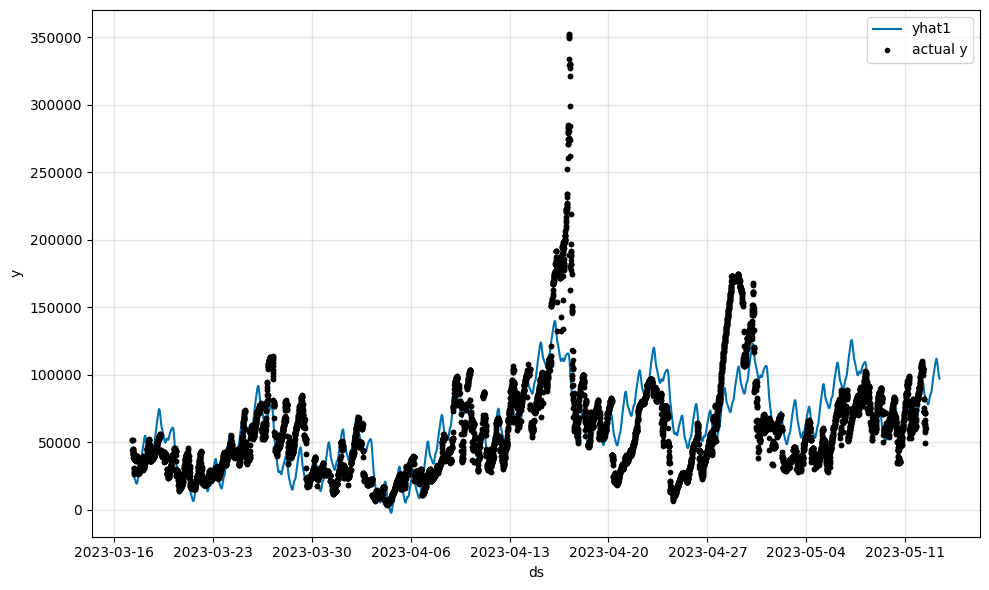

In [40]:
future = m.make_future_dataframe(df, periods=a_day_period, n_historic_predictions=True)
forecast = m.predict(future)
m.plot(forecast)

Uncertainty Quantification

1- Quantile regression

In [41]:
m = NeuralProphet()
train_df, test_df = m.split_df(df, freq="5min", valid_p=1.0 / 16)

In [45]:
confidence_lv = 0.9 # 90% confidence interval
quantile_list = [round(((1 - confidence_lv) / 2), 2), round((confidence_lv + (1 - confidence_lv) / 2), 2)]

# Create NeuralProphet object with list of quantile as parameter
qr_model = NeuralProphet(quantiles=quantile_list)
qr_model.set_plotting_backend("matplotlib")
metrics = qr_model.fit(df, freq="5min")

Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 113.77it/s]


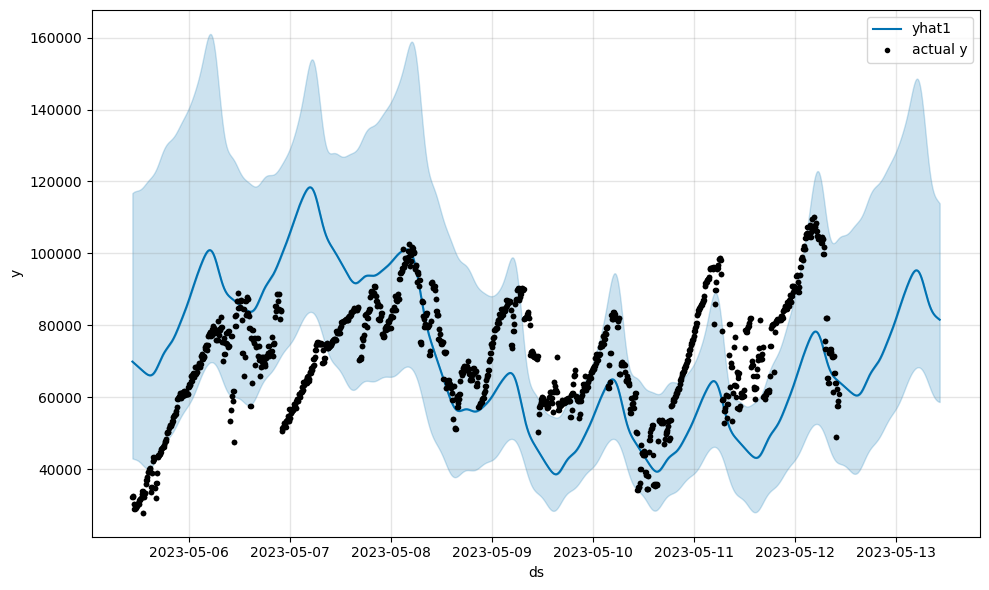

In [49]:
future = qr_model.make_future_dataframe(df, periods=a_day_period, n_historic_predictions=a_week_period)
forecast = qr_model.predict(df=future)
qr_model.plot(forecast)

2- Conformal prediction

In [50]:
from neuralprophet import NeuralProphet, uncertainty_evaluate, set_log_level, set_random_seed

In [51]:
train_df, cal_df = m.split_df(train_df, freq="5min", valid_p=1.0 / 11)

In [52]:
train_df.shape, cal_df.shape, test_df.shape

((13780, 2), (1377, 2), (1010, 2))

In [53]:
n_lags = 5

# Create a simple quantile regression model
cp_model1 = NeuralProphet(quantiles=quantile_list)
cp_model1.set_plotting_backend("matplotlib")

# Create a 4-layer autoregression model as the base
cp_model2 = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=n_lags,
    #num_hidden_layers=4,
    #d_hidden=32,
    learning_rate=0.003,
    quantiles=quantile_list,
)

In [54]:
set_random_seed(0)
metrics1 = cp_model1.fit(train_df, freq="5min")
set_random_seed(0)
metrics2 = cp_model2.fit(train_df, freq="5min")

Finding best initial lr: 100%|██████████| 253/253 [00:01<00:00, 126.66it/s]


Epoch 95: 100%|██████████| 95/95 [00:01<00:00, 62.46it/s, loss=0.000272, v_num=126, MAE=893.0, RMSE=2.41e+3, Loss=0.000339, RegLoss=0.000]     


In [461]:
# Perform estimation for the testing data with the trained model
forecast1 = cp_model1.predict(test_df)[n_lags:]
forecast2 = cp_model2.predict(test_df)[n_lags:]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 90.29it/s] 


Option 1: Naive Conformal Prediction
FIXME: conformal_predict does not work with pandas 2.X
Installing latest candidate version of NeuralProphet does not fix this issue. Downgrading pandas is required

In [ ]:
# Parameter for naive conformal prediction
method = "naive"
alpha = 1 - confidence_lv

# Enable conformal predict on the pre-trained models
# Evaluate parameter is optional, refer to the "Evaluate Performance" session below
naive_forecast1 = cp_model1.conformal_predict(
    test_df,
    calibration_df=cal_df,
    alpha=alpha,
    method=method,
    plotting_backend="matplotlib",
    #show_all_PI=True,
)
naive_forecast2 = cp_model2.conformal_predict(
    test_df,
    calibration_df=cal_df,
    alpha=alpha,
    method=method,
    plotting_backend="matplotlib",
    #show_all_PI=True,
)